In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')
import utils_auto 

# Configuration

In [3]:
trial_idx=4
paper='2004.04168'

# Code-generation prompts

In [4]:
prompt=(utils_auto.generate_prompt(template='prompt.md',docstring='docstring_triangular.md',paper=paper,save=True,trial_idx=trial_idx))

In [5]:
print(prompt)

You are a condensed matter physicist working on the numerical calculation for the Hamiltonian of a system using the Hartree Fock method. I will provide you with the physical Hamitonian written in second quantized form as an equation in LaTeX. You should convert it into a class for the HartreeFockHamiltonian using Python and necessary packages, such as numpy and scipy.
This is a multiple-step problem, and you will execute this process by analyzing the equation and answering smaller questions sequentially in order to finally generate the class. The class has the following structure:

CLASS DOCSTRING: 
```
class HartreeFockHamiltonian:
  def __init__(self, N_shell, parameters:dict[str, Any], filling_factor: float=0.5):
    self.lattice = 'square' | 'triangular'
    self.D = # LLM Task: has to define this tuple.
    self.basis_order = {'0': 'flavor_type_0', '1': 'flavor_type_1', ... 'D-1': 'flavor_type_D-1'}
    # this is the basis order that the Hamiltonian will follow

    # Occupancy re

# LLM-Generated code

In [6]:
generated_code = utils_auto.code_generate(prompt,max_tokens=25600,budget_tokens=12800,)


#################### THINKING ####################

Let's analyze the given Hamiltonian equation:

The Hamiltonian consists of three parts:
1. Kinetic part: $\hat{H}_{Kinetic} = \sum_{s, k} E_s(k) c^\dagger_s(k) c_s(k)$
2. Hartree part: $H_{\text{Hartree}} = \frac{1}{N} \sum_{s, s'} \sum_{k_1, k_2} U(0) \langle c_s^\dagger(k_1) c_s(k_1) \rangle c_{s'}^\dagger(k_2) c_{s'}(k_2)$
3. Fock part: $H_{\text{Fock}} = -\frac{1}{N} \sum_{s, s'} \sum_{k_1, k_2} U(k_1 - k_2) \langle c_s^\dagger(k_1) c_{s'}(k_1) \rangle c_{s'}^\dagger(k_2) c_s(k_2)$

The subscript $s$ appears to represent a flavor or species index. We don't see any explicit mention of multiple flavors, so I'll interpret it as a spin index (which can take two values: up and down). This is a common interpretation in many condensed matter contexts.

First, let's determine the shape of the Hamiltonian (D, D, N_k). The Hamiltonian will have the shape [D, D, N_k], where D is a tuple that accounts for all the flavors in the system, and N

In [7]:
print(generated_code['thinking'])

Let's analyze the given Hamiltonian equation:

The Hamiltonian consists of three parts:
1. Kinetic part: $\hat{H}_{Kinetic} = \sum_{s, k} E_s(k) c^\dagger_s(k) c_s(k)$
2. Hartree part: $H_{\text{Hartree}} = \frac{1}{N} \sum_{s, s'} \sum_{k_1, k_2} U(0) \langle c_s^\dagger(k_1) c_s(k_1) \rangle c_{s'}^\dagger(k_2) c_{s'}(k_2)$
3. Fock part: $H_{\text{Fock}} = -\frac{1}{N} \sum_{s, s'} \sum_{k_1, k_2} U(k_1 - k_2) \langle c_s^\dagger(k_1) c_{s'}(k_1) \rangle c_{s'}^\dagger(k_2) c_s(k_2)$

The subscript $s$ appears to represent a flavor or species index. We don't see any explicit mention of multiple flavors, so I'll interpret it as a spin index (which can take two values: up and down). This is a common interpretation in many condensed matter contexts.

First, let's determine the shape of the Hamiltonian (D, D, N_k). The Hamiltonian will have the shape [D, D, N_k], where D is a tuple that accounts for all the flavors in the system, and N_k is the number of k points on the lattice. 

In the

In [8]:
print(generated_code['text'])

# ANSWER:

1) Number of Flavors, D = (2,)
Basis Order:
0: spin. Order: spin_up, spin_down

2) EXP-VAL DEPENDENT TERMS: {
    r"\langle c_s^\dagger(k_1) c_s(k_1) \rangle": "exp_val[s, s, :]",
    r"\langle c_s^\dagger(k_1) c_{s'}(k_1) \rangle": "exp_val[s, s', :]"
}
  
TERMS:
- E_s(k) c^\dagger_s(k) c_s(k) -> H[s, s, k], NI (Kinetic term)
- U(0) \langle c_s^\dagger(k_1) c_s(k_1) \rangle c_{s'}^\dagger(k_2) c_{s'}(k_2) -> H[s', s', k2], I (Hartree term)
- -U(k_1 - k_2) \langle c_s^\dagger(k_1) c_{s'}(k_1) \rangle c_{s'}^\dagger(k_2) c_s(k_2) -> H[s', s, k2], I (Fock term)

3) CODE:
```python
import numpy as np
from typing import Any
from HF import *

class HartreeFockHamiltonian:
    """
    Defines the Hartree-Fock Hamiltonian for a system with a triangular lattice,
    with nearest and next-nearest neighbor hopping, and on-site and nearest-neighbor
    interactions.
    
    Args:
        N_shell (int): Number of shells in the first Brillouin zone.
        parameters (dict): Dictionary

In [9]:
code = utils_auto.extract_code(generated_code['text'])

In [10]:
print(code)

import numpy as np
from typing import Any
from HF import *

class HartreeFockHamiltonian:
    """
    Defines the Hartree-Fock Hamiltonian for a system with a triangular lattice,
    with nearest and next-nearest neighbor hopping, and on-site and nearest-neighbor
    interactions.
    
    Args:
        N_shell (int): Number of shells in the first Brillouin zone.
        parameters (dict): Dictionary containing model parameters.
        filling_factor (float): Filling factor (default is 0.5).
    """
    def __init__(self, N_shell: int, parameters: dict[str, Any]={'t_1': 6.0, 't_2': 1.0, 'U_0': 1.0, 'U_1': 0.5, 'T': 0, 'a': 1.0}, filling_factor: float=0.5):
        self.lattice = 'triangular'
        self.D = (2,)  # Spin flavor
        self.basis_order = {'0': 'spin'}
        # Order for spin flavor: 0 = spin_up, 1 = spin_down
        
        # Occupancy relevant parameters
        self.nu = filling_factor
        self.T = parameters.get('T', 0.0)  # Temperature, default to 0
       

In [11]:
utils_auto.save_code(code,paper,trial_idx)

Code saved to code_2004_04168_4.py


# Code evaluation

In [12]:
code_path = 'code_{int}_{decimal}_{trial_idx}'.format(int=paper.split('.')[0],decimal=paper.split('.')[1],trial_idx=trial_idx) 

In [13]:
import importlib

In [14]:
module = importlib.import_module(code_path)

In [15]:
import HF

## Task 1: Check k-space

In [16]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

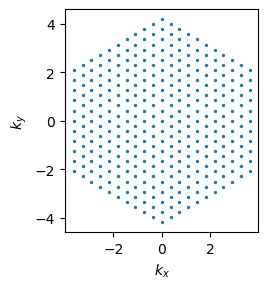

In [17]:
fig1=utils_auto.plot_kspace(kspace=ham.k_space)

## Task 2: Check energy dispersion for non-interacting term

In [18]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

In [19]:
h_nonint = ham.generate_non_interacting()

In [20]:
wf,en= HF.diagonalize(h_nonint) # or HF.diagonalize

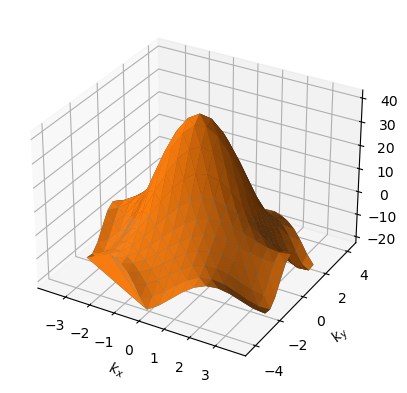

In [21]:
utils_auto.plot_2d_bandstructure(ham,en)

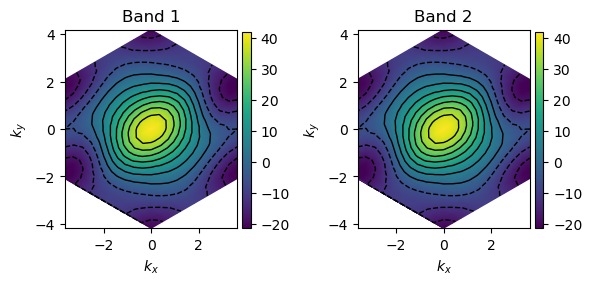

In [22]:
fig2=utils_auto.plot_2d_false_color_map(ham,en)

## Task 3: Infinitesemial U limit

In [23]:
ham_int= module.HartreeFockHamiltonian(N_shell=10, parameters={'U_0': 1e-5},filling_factor=0.5)

In [24]:
wf,en= HF.diagonalize(ham_int.generate_non_interacting())
exp_val= HF.get_exp_val(wf,en,0.5,0)

In [25]:
wf_int, en_int, exp_val= HF.solve(ham_int,1e-10*exp_val,100)

Convergence reached at iteration 1


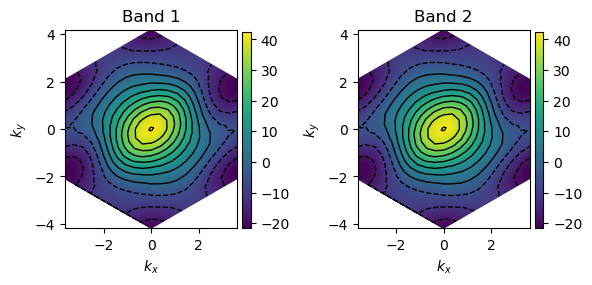

In [26]:
fig3=utils_auto.plot_2d_false_color_map(ham_int,en_int)

## Task 4: Large U limit

In [27]:
ham_int= module.HartreeFockHamiltonian(N_shell=10, parameters={'U_0': 1e5},filling_factor=0.5)

In [28]:
h_nonint=ham_int.generate_non_interacting()
h_nonint[0,0,:]-=100
wf,en=HF.diagonalize(h_nonint)
exp_val=HF.get_exp_val(wf,en,0.5,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [29]:
wf_int, en_int, exp_val_int=HF.solve(ham_int,exp_val,100)

Convergence reached at iteration 1


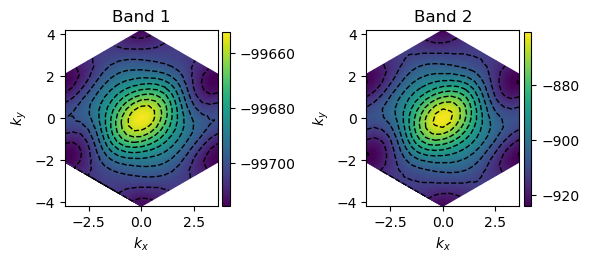

In [30]:
fig4=utils_auto.plot_2d_false_color_map(ham_int,en_int)

In [31]:
utils_auto.print_gap(ham_int,exp_val,en_int)

Gap is 98727.98
U/T is 4093.70
mean_U is 24999.09


# Auto eval

## Task 1

In [32]:
result1 = utils_auto.vision_eval(
    fig=fig1, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics1.md', image='image1.md', paper=paper)
    )


#################### THINKING ####################

Let me analyze the given problem and the image based on the provided rubric.

The rubric asks me to check whether the image shows a momentum space mesh in the first Brillouin zone of the concerned problem, and to check the point group symmetry.

The problem specifies:
- A Hamiltonian in second quantized form
- A triangular lattice
- Nearest-neighbor hopping (t_1 = 6 meV) and next-nearest-neighbor hopping (t_2 = 1 meV)
- On-site and nearest neighbor interactions are considered

Now, let's analyze the image:

The image shows a hexagonal arrangement of points in the k-space (momentum space), with k_x on the horizontal axis and k_y on the vertical axis. The points form a regular grid within a hexagonal boundary.

First, I need to determine if this represents the first Brillouin zone of a triangular lattice:

For a triangular lattice, the first Brillouin zone is indeed a hexagon in the reciprocal (momentum) space. This is because the tria

In [33]:
answer1=utils_auto.extract_result_content(result1['text'])

## Task 2

In [34]:
result2 = utils_auto.vision_eval(
    fig=fig2, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics2.md', image='image2.md', paper=paper)
    )


#################### THINKING ####################

Alright, so I'm being asked to analyze the false color plots in the image showing band structure in the first Brillouin zone for a triangular lattice system. Let me follow the rubric step by step to determine if these plots correctly represent what's expected.

1. First, identify the shape of the Brillouin zone boundary and confirm it matches what's expected for a triangular lattice.

Looking at the image, I can see that the Brillouin zone boundary forms a hexagon. This is indeed the expected shape for a triangular lattice in reciprocal space. The hexagonal boundary is visible in both Band 1 and Band 2 plots. So this point is correct.

2. Next, examine the symmetry of the energy distribution shown by the false color plot:

2.1 Identify the highest energy regions (yellow):
In both Band 1 and Band 2, the highest energy regions (yellow) appear to be concentrated at the center of the Brillouin zone, around the point (0,0), also known as 

In [35]:
answer2=utils_auto.extract_result_content(result2['text'])

## Task 3

In [36]:
result3 = utils_auto.vision_eval(
    fig=fig3, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics3.md', image='image3.md', paper=paper, Gap=0, nu=1/2)
    )


#################### THINKING ####################

Let me analyze this problem systematically using the rubric provided. The image shows band structure plots for two bands (Band 1 and Band 2) in what appears to be the first Brillouin zone of a triangular lattice after a self-consistent Hartree-Fock calculation with infinitesimal interaction.

Let's go through the rubric point by point:

1. First, identify the shape of the Brillouin zone boundary and confirm it matches what's expected for a triangular lattice.

Looking at the image, the Brillouin zone boundary has a hexagonal shape, which is indeed correct for a triangular lattice. The first Brillouin zone of a triangular lattice is hexagonal, and this is clearly shown in the plots.

2. Next, examine the symmetry of the energy distribution shown by the false color plot:

2.1 Identify the highest energy regions (yellow):
The highest energy regions (yellow) appear at the center of both plots, around (kx,ky) = (0,0).

2.2 Trace the patte

In [37]:
answer3=utils_auto.extract_result_content(result3['text'])

## Task 4

In [38]:
result4 = utils_auto.vision_eval(
    fig=fig4, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics4.md', image='image4.md', paper=paper,nu=1/2,U_int=1e5)
    )


#################### THINKING ####################

Let me carefully analyze the image according to the rubric:

1. Identifying the shape of the Brillouin zone boundary:
   The image shows a hexagonal boundary for the Brillouin zone, which is indeed expected for a triangular lattice. The hexagonal shape is clearly visible in both Band 1 and Band 2 plots. This matches what I would expect for a triangular lattice. ✓

2. Examining the symmetry of the energy distribution:

   2.1 Identifying highest energy regions:
       In Band 1, the highest energy region (least negative, closer to yellow in the color scale) appears at the center of the zone (around k_x = 0, k_y = 0).
       In Band 2, the highest energy region is also at the center of the zone.
       
   2.2 Tracing the pattern of energy variation:
       In both bands, energy decreases (becomes more negative) as we move outward from the center in a roughly concentric pattern, with the lowest energies (darkest blue) at the corners an

In [39]:
answer4=utils_auto.extract_result_content(result4['text'])

In [40]:
utils_auto.save_final_answer(paper,trial_idx,answer1,answer2,answer3,answer4)

Final answer record for '4' saved to final_answer.yaml
